In [22]:

import pandas as pd
from glob import glob
from pathlib import Path


In [27]:
# Load clinical data
demographics_df = pd.read_csv('participants.tsv', sep='\t')

# Load and concatenate all subject data files
subject_files = glob('/cifs/trident/projects/mouse_appmaptapoe/lightsheet/derivatives/SPIMquant/v0.1.1-alpha/sub-[MF]*/micr/sub*seg-roi22_from-ABAv3_dslevel-5_desc-otsupenalty_segstats.tsv')
subject_data_list = []

for file in subject_files:
    subject_df = pd.read_csv(file, sep='\t')
    participant_id = Path(file).name.split('_')[0]
    subject_df['participant_id'] = participant_id  # Add participant ID column
    subject_data_list.append(subject_df)

all_subject_data = pd.concat(subject_data_list)

# Merge subject data with clinical data
merged_data = all_subject_data.merge(demographics_df, on='participant_id')

In [28]:
merged_data

,index,name,abbreviation,volume,avg_fieldfrac,participant_id,participant_label,genotype,group_label,suspected_abeta_load,sex,foldername
0,1,L_Olfactory areas,L_OLF,0.0,0.354919,sub-F1A1Te4,F1A1Te4,hAPPNL_MAPT_ApoE4,2,NaN,Female,240904_4_F1_A1Te4_70_D_63_4x1_23-10-52
1,2,R_Olfactory areas,R_OLF,0.0,0.041093,sub-F1A1Te4,F1A1Te4,hAPPNL_MAPT_ApoE4,2,NaN,Female,240904_4_F1_A1Te4_70_D_63_4x1_23-10-52
2,3,L_Isocortex,L_Iso,0.0,0.123302,sub-F1A1Te4,F1A1Te4,hAPPNL_MAPT_ApoE4,2,NaN,Female,240904_4_F1_A1Te4_70_D_63_4x1_23-10-52
3,4,R_Isocortex,R_ISO,0.0,0.160152,sub-F1A1Te4,F1A1Te4,hAPPNL_MAPT_ApoE4,2,NaN,Female,240904_4_F1_A1Te4_70_D_63_4x1_23-10-52
4,5,L_Hippocampal formation,L_HYP,0.0,0.201485,sub-F1A1Te4,F1A1Te4,hAPPNL_MAPT_ApoE4,2,NaN,Female,240904_4_F1_A1Te4_70_D_63_4x1_23-10-52
...,...,...,...,...,...,...,...,...,...,...,...,...
215,18,R_Midbrain,R_MB,0.0,0.195622,sub-M7A1Te4,M7A1Te4,hAPPNL_MAPT_ApoE4,2,NaN,Male,240907_16_M7_A1Te4_71_F_63_4x1_21-07-03
216,19,L_Hindbrain,L_HB,0.0,0.200151,sub-M7A1Te4,M7A1Te4,hAPPNL_MAPT_ApoE4,2,NaN,Male,240907_16_M7_A1Te4_71_F_63_4x1_21-07-03
217,20,R_Hindbrain,R_HB,0.0,0.090688,sub-M7A1Te4,M7A1Te4,hAPPNL_MAPT_ApoE4,2,NaN,Male,240907_16_M7_A1Te4_71_F_63_4x1_21-07-03
218,21,L_Cerebellum,L_CEB,0.0,0.460737,sub-M7A1Te4,M7A1Te4,hAPPNL_MAPT_ApoE4,2,NaN,Male,240907_16_M7_A1Te4_71_F_63_4x1_21-07-03


In [29]:
# Optional: Pivot data to have each ROI as a separate column for `avg_fieldfrac`
pivoted_data = merged_data.pivot_table(index=['participant_id', 'genotype', 'group_label', 'suspected_abeta_load', 'sex'],
                                       columns='name', values='avg_fieldfrac').reset_index()
pivoted_data

name,participant_id,genotype,group_label,suspected_abeta_load,sex,L_Amygdala,L_Cerebellum,L_Hindbrain,L_Hippocampal formation,L_Hypothalamus,...,R_Cerebellum,R_Hindbrain,R_Hippocampal formation,R_Hypothalamus,R_Isocortex,R_Midbrain,R_Olfactory areas,R_Pallidum,R_Striatum,R_Thalamus
0,sub-F1A2Te3,hAPPNL-F_MAPT_ApoE3,3,Low,Female,0.006967,0.169307,0.014026,0.183512,0.199557,...,0.082373,0.080597,0.058362,0.048637,0.115317,0.111184,0.053856,0.010947,0.006904,0.159303
1,sub-F2A2Te3,hAPPNL-F_MAPT_ApoE3,3,Low,Femlae,0.024669,0.192432,0.091942,0.089389,0.059621,...,0.366015,0.026798,0.091056,0.138795,0.236677,0.114796,0.116821,0.160653,0.244353,0.169633
2,sub-F6A2Te3,hAPPNL-F_MAPT_ApoE3,3,Low,Female,0.101414,0.367427,0.132692,0.326594,0.250204,...,0.525431,0.200043,0.100906,0.113586,0.288359,0.203239,0.138794,0.013239,0.060054,0.051488
3,sub-M1A2Te3,hAPPNL-F_MAPT_ApoE3,3,Low (Probably None),Male,0.013290,0.295546,0.052166,0.115553,0.081230,...,0.473223,0.104919,0.106485,0.090450,0.148582,0.144016,0.084809,0.083858,0.070072,0.612553
4,sub-M3A2Te3,hAPPNL-F_MAPT_ApoE3,3,Low (Probably None),Male,0.002143,0.669566,0.146643,0.023597,0.002507,...,0.273260,0.133051,0.017627,0.010630,0.037214,0.064593,0.020644,0.001175,0.006889,0.032944
5,sub-M4A2Te3,hAPPNL-F_MAPT_ApoE3,3,Low (Probably None),Male,0.000014,0.000131,0.000005,0.001309,0.000108,...,0.000234,0.000002,0.004066,0.000031,0.001913,0.000358,0.000749,0.000524,0.005308,0.002833


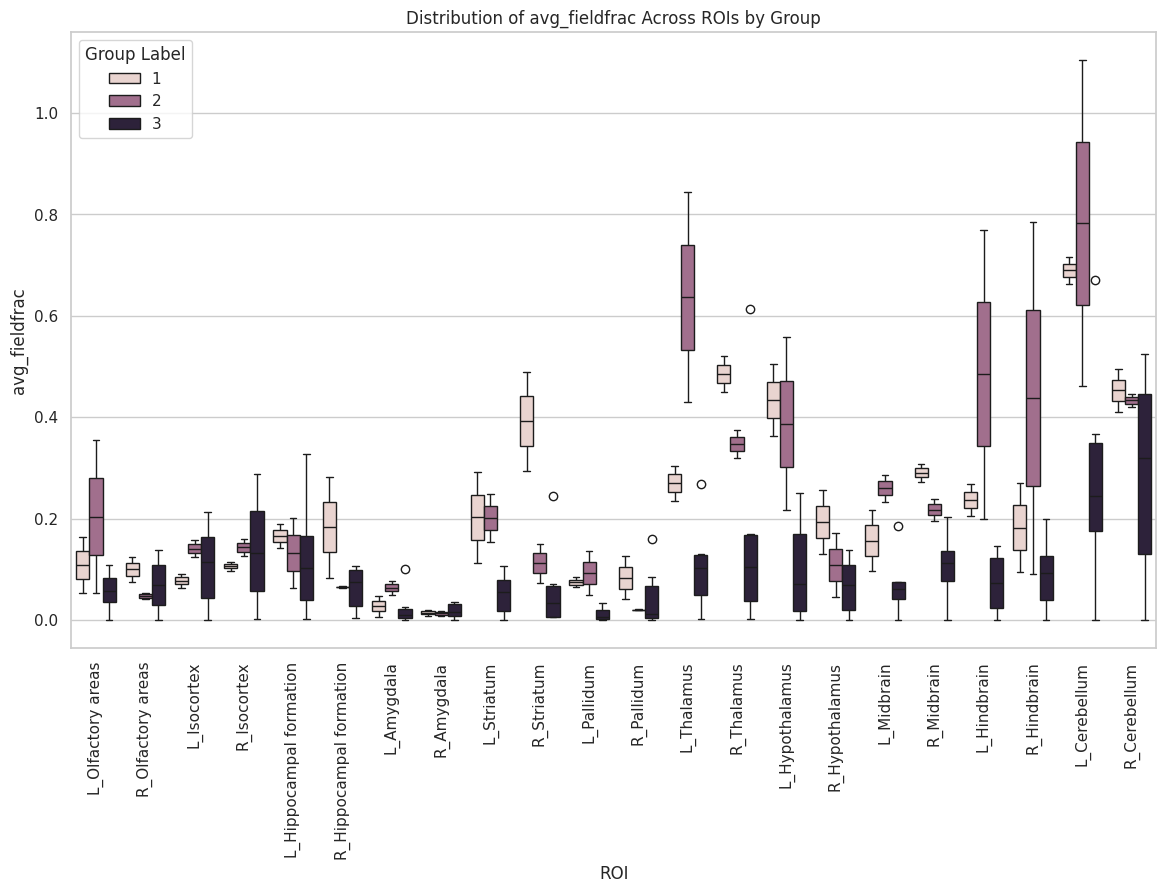

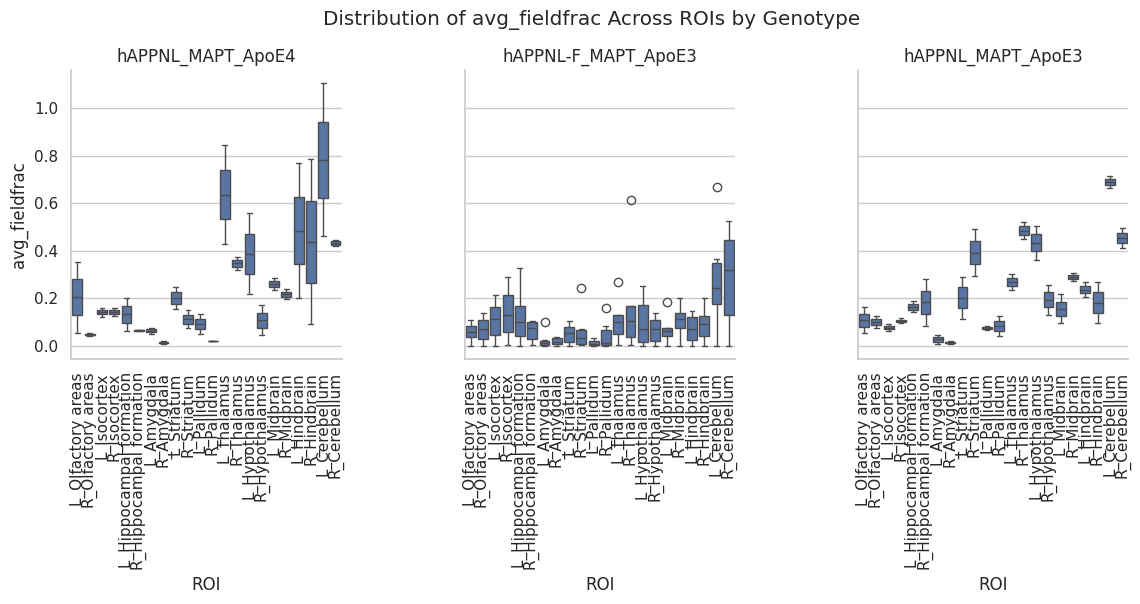

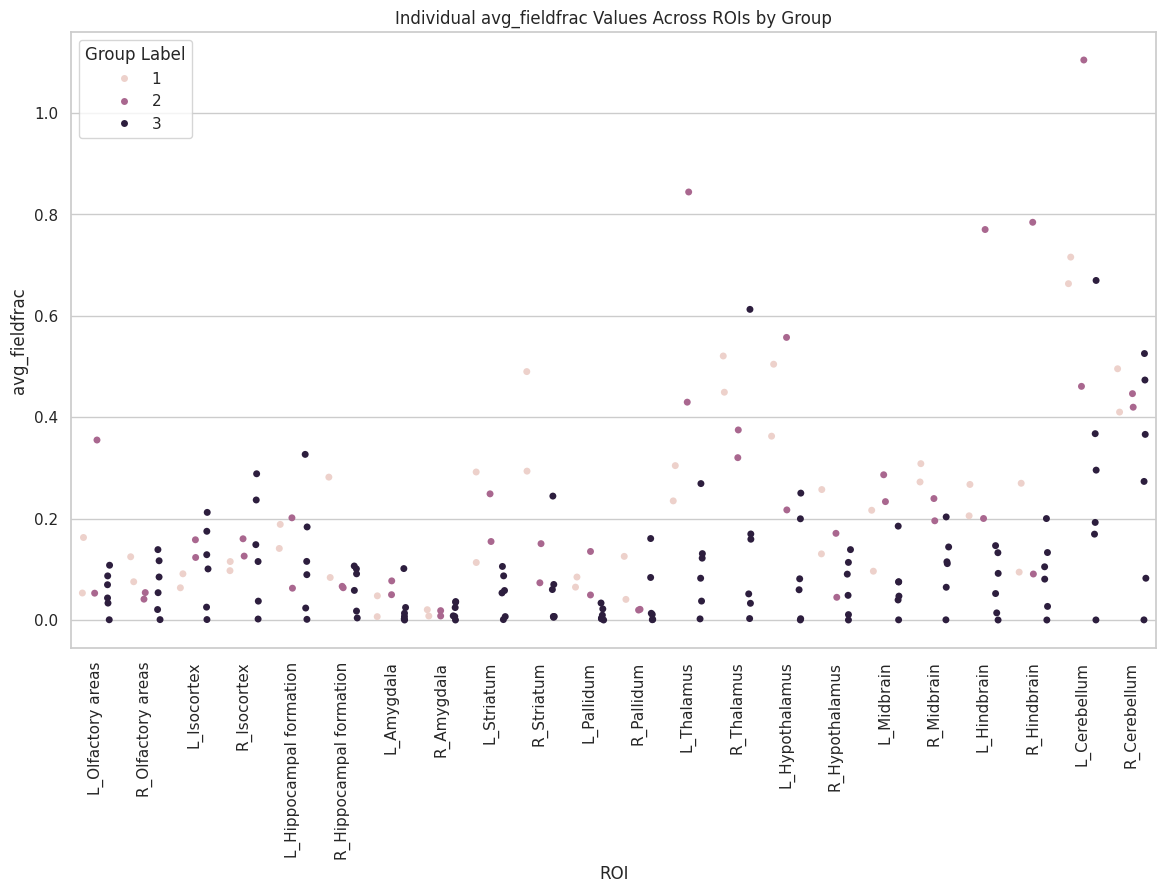

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up plotting style for consistency
sns.set(style="whitegrid")

# 1. Boxplot - avg_fieldfrac by group for each ROI
plt.figure(figsize=(14, 8))
sns.boxplot(data=merged_data, x='name', y='avg_fieldfrac', hue='group_label')
plt.xticks(rotation=90)
plt.title('Distribution of avg_fieldfrac Across ROIs by Group')
plt.xlabel('ROI')
plt.ylabel('avg_fieldfrac')
plt.legend(title='Group Label')
plt.show()

# 2. FacetGrid - avg_fieldfrac by genotype for each ROI
g = sns.FacetGrid(merged_data, col='genotype', col_wrap=3, height=4, sharey=True)
g.map(sns.boxplot, 'name', 'avg_fieldfrac', order=merged_data['name'].unique())
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
g.set_axis_labels('ROI', 'avg_fieldfrac')
g.set_titles(col_template='{col_name}')
g.fig.suptitle('Distribution of avg_fieldfrac Across ROIs by Genotype', y=1.05)
plt.show()

# 3. Strip Plot - avg_fieldfrac by group, showing each individual value for each ROI
plt.figure(figsize=(14, 8))
sns.stripplot(data=merged_data, x='name', y='avg_fieldfrac', hue='group_label', jitter=True, dodge=True)
plt.xticks(rotation=90)
plt.title('Individual avg_fieldfrac Values Across ROIs by Group')
plt.xlabel('ROI')
plt.ylabel('avg_fieldfrac')
plt.legend(title='Group Label')
plt.show()
